# Model Evaluation
In this will test the model on three classfication models
1. __Logistic Regression 2. Random Forest 3. Support Vector Machine (SVM)__
* Trained and Tested the models without hyper-parameter tuning.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(xr, yr, test_size=0.3)

In [104]:
print("X_train shape:", xtrain.shape)
print("X_test shape:", xtest.shape)
print("y_train shape:", ytrain.shape)
print("y_test shape:", ytest.shape)

X_train shape: (34608, 14)
X_test shape: (14832, 14)
y_train shape: (34608,)
y_test shape: (14832,)


Traning and testing all three models at once, genetaring the scores for the same and then picking the best model.

In [103]:
models={
    "Logistic Regression":LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector machine": SVC()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(xtrain, ytrain)
    
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)
    
    
    model_train_accuracy = accuracy_score(ytrain,ytrain_pred)
    model_train_f1 = f1_score(ytrain,ytrain_pred,average='weighted')
    model_train_precision = precision_score(ytrain,ytrain_pred)
    model_train_recall = recall_score(ytrain,ytrain_pred)
    
    
    model_test_accuracy = accuracy_score(ytest,ytest_pred)
    model_test_f1 = f1_score(ytest,ytest_pred,average='weighted')
    model_test_precision = precision_score(ytest,ytest_pred)
    model_test_recall = recall_score(ytest,ytest_pred)
    
    
    print(list(models.keys())[i])

    print('Model performance for training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 score: {:.4f}".format(model_train_f1))

    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))

    print('---------------------------')

    print('Model performance for test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))

    print('='*35)
    print('\n')
    

Logistic Regression
Model performance for training set
- Accuracy: 0.6646
- F1 score: 0.6634
- Precision: 0.6868
- Recall: 0.6055
---------------------------
Model performance for test set
- Accuracy: 0.6606
- F1 score: 0.6596
- Precision: 0.6797
- Recall: 0.6065


Random Forest Classifier
Model performance for training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 0.9999
---------------------------
Model performance for test set
- Accuracy: 0.8892
- F1 score: 0.8892
- Precision: 0.8906
- Recall: 0.8873


Support Vector machine
Model performance for training set
- Accuracy: 0.5936
- F1 score: 0.5203
- Precision: 0.9298
- Recall: 0.2027
---------------------------
Model performance for test set
- Accuracy: 0.5910
- F1 score: 0.5160
- Precision: 0.9264
- Recall: 0.1971




From the above model Logistic regression and Support vector machine has failed to give good scores,
Whereas __RandomForestclassifier__ with best results of 
- Accuracy: 0.8892
- F1 score: 0.8892
- Precision: 0.8906
- Recall: 0.8873.
/Hence I will perform hyperparameter tuning on this RandomForest model to increase the accuracy and the scores.

In [105]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
rf_params= {"max_depth": [int(x) for x in np.linspace(start=40, stop=100, num=7)],
           "min_samples_split": [2, 7, 8, 10, 18, 20],
           "n_estimators": [100, 200, 500,]}

In [123]:
rf_params

{'max_depth': [40, 50, 60, 70, 80, 90, 100],
 'min_samples_split': [2, 7, 8, 10, 18, 20],
 'n_estimators': [100, 200, 500]}

In [124]:
randomcv_models = [("RF", RandomForestClassifier(), rf_params)]

In [125]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [40, 50, 60, 70, 80, 90, 100],
   'min_samples_split': [2, 7, 8, 10, 18, 20],
   'n_estimators': [100, 200, 500]})]

In [ ]:
rf_model = Ra

In [132]:
random = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=rf_params,
                                   n_iter=12,
                                   cv=3,
                                   n_jobs=-1)
random.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=12,
                   n_jobs=-1,
                   param_distributions={'max_depth': [40, 50, 60, 70, 80, 90,
                                                      100],
                                        'min_samples_split': [2, 7, 8, 10, 18,
                                                              20],
                                        'n_estimators': [100, 200, 500]})

In [137]:
random.best_params_

{'n_estimators': 200, 'min_samples_split': 8, 'max_depth': 100}

In [138]:
random.best_score_

0.8914123901987979

Now traning the model with the above given parameters to get the best results.

In [139]:
Final_RF = RandomForestClassifier(n_estimators=200, min_samples_split=8, max_depth=90)

In [140]:
Final_RF.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=90, min_samples_split=8, n_estimators=200)

In [141]:
Final_RF_pred = Final_RF.predict(xtest)

In [142]:
model_test_accuracy = accuracy_score(ytest,Final_RF_pred)
model_test_f1 = f1_score(ytest,Final_RF_pred,average='weighted')
model_test_precision = precision_score(ytest,Final_RF_pred)
model_test_recall = recall_score(ytest,Final_RF_pred)

In [150]:
    print('Model performance for test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))


Model performance for test set
- Accuracy: 0.8921
- F1 score: 0.8921
- Precision: 0.8929
- Recall: 0.8908


In [156]:
print(classification_report(ytest, Final_RF_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      7421
           1       0.89      0.89      0.89      7411

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



In [164]:
cm #confusion matrix

array([[6629,  792],
       [ 809, 6602]], dtype=int64)

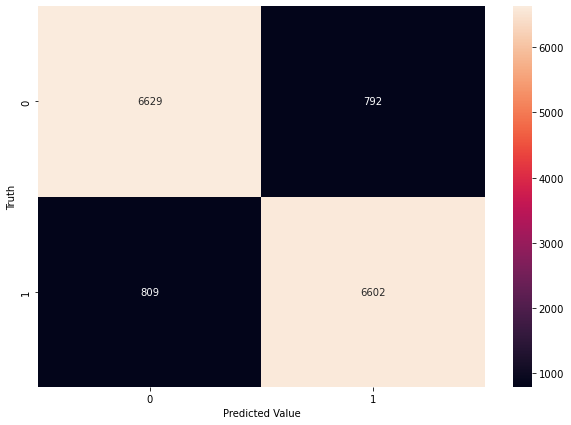

In [159]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, Final_RF_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()

The final model of RandomForest gives the best output for the data, with precion and scores of close to 90% after hyperparameter tuning. Hence the predicted model can give the accuracy results upto 90% to predict the individual income based on features outcomes.